# Quantitative comparisons and statistical visualizations
Visualizations can be used to compare data in a quantitative manner. This chapter explains several methods for quantitative visualizations.

## Bar chart

Bar charts visualize data that is organized according to categories as a series of bars, where the height of each bar represents the values of the data in this category.

For example, in this exercise, you will visualize the number of gold `medals` won by each country in the provided medals DataFrame. The DataFrame contains the countries as the index, and a column called `"Gold"` that contains the number of gold medals won by each country, according to their rows.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
medals = pd.read_csv('datasets/medals_by_country_2016.csv', index_col=0)
medals.head()

,Bronze,Gold,Silver
United States,67,137,52
Germany,67,47,43
Great Britain,26,64,55
Russia,35,50,28
China,35,44,30


### Instructions
- Call the `ax.bar` method to plot the "Gold" column as a function of the country.
- Use the `ax.set_xticklabels` to set the x-axis tick labels to be the country names.
- In the call to `ax.set_xticklabels` rotate the x-axis tick labels by 90 degrees by using the `rotation` key-word argument.
- Set the y-axis label to `"Number of medals"`.

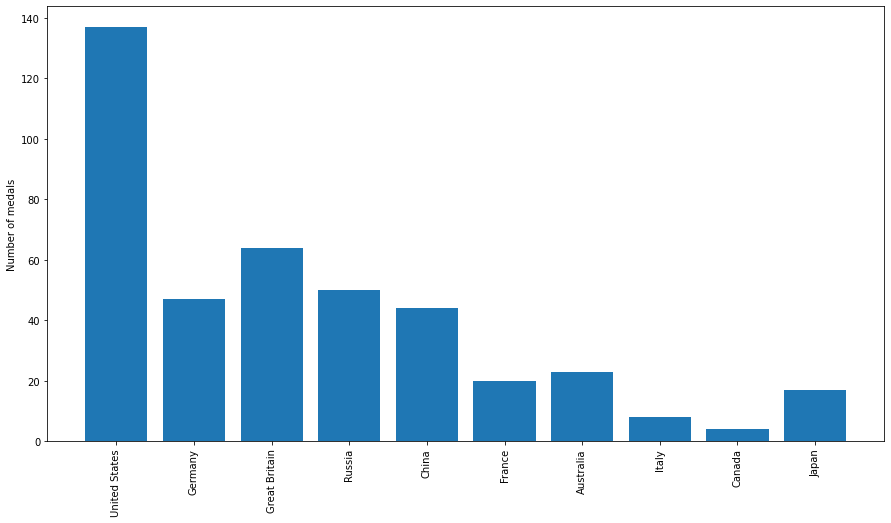

In [2]:
fig, ax = plt.subplots(figsize = (15,8))

# Plot a bar-chart of gold medals as a function of country
ax.bar(medals.index, medals['Gold'])

# Set the x-axis tick labels to the country names
ax.set_xticks(medals.index) # Needed to avoid warning.
ax.set_xticklabels(medals.index, rotation = 90)

# Set the y-axis label
ax.set_ylabel('Number of medals')

plt.show()

## Stacked bar chart

A stacked bar chart contains bars, where the height of each bar represents values. In addition, stacked on top of the first variable may be another variable. The additional height of this bar represents the value of this variable. And you can add more bars on top of that.

In this exercise, you will have access to a DataFrame called `medals` that contains an index that holds the names of different countries, and three columns: `"Gold"`, `"Silver"` and `"Bronze"`. You will also have a Figure, `fig`, and Axes, `ax`, that you can add data to.

You will create a stacked bar chart that shows the number of gold, silver, and bronze medals won by each country, and you will add labels and create a legend that indicates which bars represent which medals.

### Instructions
- Call the `ax.bar` method to add the `"Gold"` medals. Call it with the `label` set to `"Gold"`.
- Call the `ax.bar` method to stack `"Silver"` bars on top of that, using the `bottom` key-word argument so the bottom of the bars will be on top of the gold medal bars, and `label` to add the label `"Silver"`.
- Use `ax.bar` to add `"Bronze"` bars on top of that, using the `bottom` key-word and `label` it as `"Bronze"`.

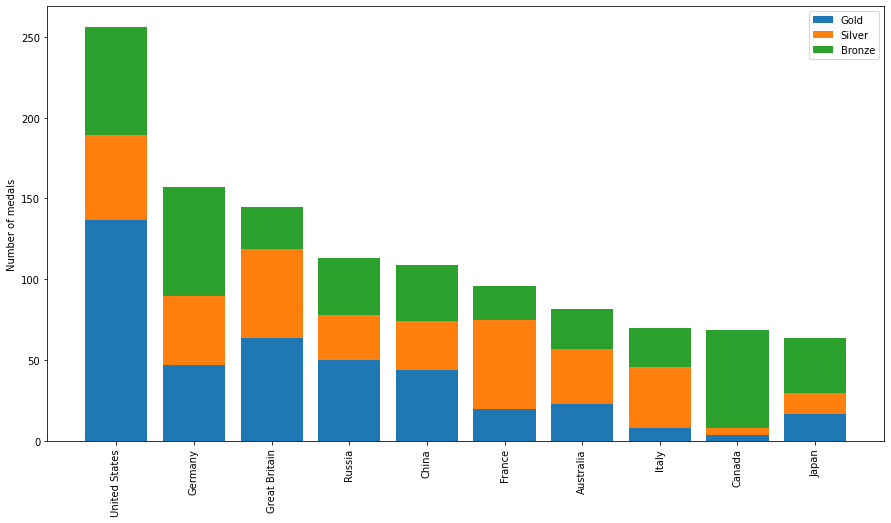

In [3]:
fig, ax = plt.subplots(figsize = (15,8))

# Add bars for "Gold" with the label "Gold"
ax.bar(medals.index, medals['Gold'], label='Gold')

# Stack bars for "Silver" on top with label "Silver"
ax.bar(medals.index, medals['Silver'], bottom = medals['Gold'], label = 'Silver')

# Stack bars for "Bronze" on top of that with label "Bronze"
ax.bar(medals.index, medals['Bronze'], bottom = medals['Gold'] + medals['Silver'], label = 'Bronze')

# Avoid Warning
ax.set_xticks(medals.index)

# Rotate x labels and define y label
ax.set_xticklabels(medals.index, rotation = 90)
ax.set_ylabel('Number of medals')

ax.legend()
plt.show()

## Creating histograms

Histograms show the full distribution of a variable. In this exercise, we will display the distribution of weights of medalists in gymnastics and in rowing in the 2016 Olympic games for a comparison between them.

You will have two DataFrames to use. The first is called `mens_rowing` and includes information about the medalists in the men's rowing events. The other is called `mens_gymnastics` and includes information about medalists in all of the Gymnastics events.

In [4]:
medalists = pd.read_csv('datasets/summer2016.csv', index_col= 0)
medalists.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
175,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver
450,250,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver


In [5]:
medalists.shape

(2014, 15)

In [6]:
mens_rowing = medalists[(medalists['Sport'] == 'Rowing') & (medalists['Sex'] == 'M')]
mens_gymnastics = medalists[(medalists['Sport'] == 'Gymnastics') & (medalists['Sex'] == 'M')]

### Instructions
- Use the `ax.hist` method to add a histogram of the `"Weight"` column from the `mens_rowing` DataFrame.
- Use `ax.hist` to add a histogram of `"Weight"` for the `mens_gymnastics` DataFrame.
- Set the x-axis label to `"Weight (kg)"` and the y-axis label to `"# of observations"`.

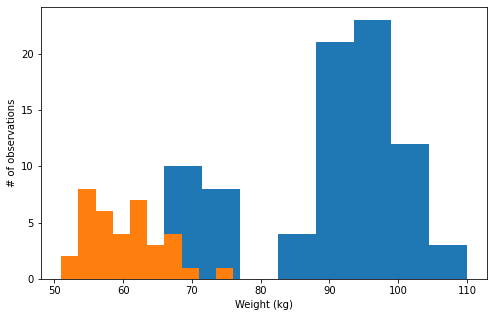

In [7]:
fig, ax = plt.subplots(figsize = (8,5))

# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing['Weight'])

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics['Weight'])

# Set the x-axis label to "Weight (kg)"
ax.set_xlabel('Weight (kg)')

# Set the y-axis label to "# of observations"
ax.set_ylabel('# of observations')

plt.show()

## "Step" histogram

Histograms allow us to see the distributions of the data in different groups in our data. In this exercise, you will select groups from the Summer 2016 Olympic Games medalist dataset to compare the height of medalist athletes in two different sports.

The data is stored in a Pandas DataFrame object called `summer_2016_medals` that has a column "Height". In addition, you are provided a Pandas GroupBy object that has been grouped by the sport.

In this exercise, you will visualize and label the histograms of two sports: "Gymnastics" and "Rowing" and see the marked difference between medalists in these two sports.

### Instructions
- Use the `hist` method to display a histogram of the `"Weight"` column from the `mens_rowing` DataFrame, label this as `"Rowing"`.
- Use `hist` to display a histogram of the `"Weight"` column from the `mens_gymnastics` DataFrame, and label this as `"Gymnastics"`.
- For both histograms, use the `histtype` argument to visualize the data using the `'step'` type and set the number of bins to use to 5.
- Add a legend to the figure, before it is displayed.

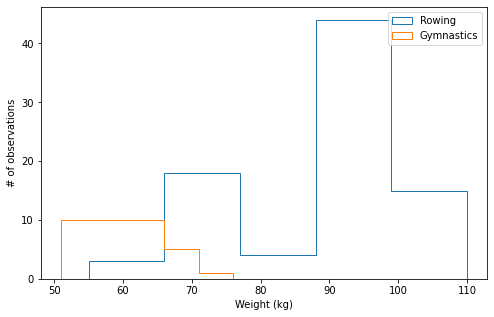

In [8]:
fig, ax = plt.subplots(figsize = (8,5))

# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing['Weight'], label = 'Rowing', histtype = 'step', bins = 5)

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics['Weight'], label = 'Gymnastics', histtype = 'step', bins = 5)

ax.set_xlabel("Weight (kg)")
ax.set_ylabel("# of observations")

# Add the legend and show the Figure
ax.legend()
plt.show()

## Adding error-bars to a bar chart

Statistical plotting techniques add quantitative information for comparisons into the visualization. For example, in this exercise, we will add error bars that quantify not only the difference in the means of the height of medalists in the 2016 Olympic Games, but also the standard deviation of each of these groups, as a way to assess whether the difference is substantial relative to the variability within each group.

For the purpose of this exercise, you will have two DataFrames: `mens_rowing` holds data about the medalists in the rowing events and `mens_gymnastics` will hold information about the medalists in the gymnastics events. 

### Instructions

- Add a bar with size equal to the mean of the `"Height"` column in the `mens_rowing` DataFrame and an error-bar of its standard deviation.
- Add another bar for the mean of the `"Height"` column in `mens_gymnastics` with an error-bar of its standard deviation.
- Add a label to the the y-axis: `"Height (cm)"`.

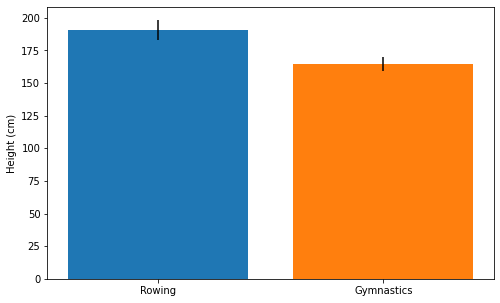

In [17]:
fig, ax = plt.subplots(figsize=(8,5))

# Add a bar for the rowing "Height" column mean/std
ax.bar("Rowing", mens_rowing['Height'].mean(), yerr = mens_rowing['Height'].std())

# Add a bar for the gymnastics "Height" column mean/std
ax.bar('Gymnastics', mens_gymnastics['Height'].mean(), yerr = mens_gymnastics['Height'].std())

# Label the y-axis
ax.set_ylabel("Height (cm)")

plt.show()

## Adding error-bars to a plot

Adding error-bars to a plot is done by using the `errorbars` method of the `Axes` object.

Here, you have two DataFrames loaded: `seattle_weather` has data about the weather in Seattle and `austin_weather` has data about the weather in Austin. Each DataFrame has a column `"MONTH"` that has the names of the months, a column `"MLY-TAVG-NORMAL"` that has the average temperature in each month and a column `"MLY-TAVG-STDDEV"` that has the standard deviation of the temperatures across years.

In the exercise, you will plot the mean temperature across months and add the standard deviation at each point as y errorbars.

In [20]:
import calendar # Used for calendar.month_abbr inside lambda function
austin_weather = pd.read_csv('datasets/austin_weather.csv')
# DF miss MONTH column, wee ned to generate it.
austin_weather['MONTH'] = austin_weather['DATE'].apply(lambda x: calendar.month_abbr[x])
austin_weather = austin_weather.set_index('DATE')
austin_weather = austin_weather[austin_weather['NAME'] == 'AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US']


seattle_weather = pd.read_csv('datasets/seattle_weather.csv')
seattle_weather['MONTH'] = seattle_weather['DATE'].apply(lambda x: calendar.month_abbr[x])
seattle_weather = seattle_weather.set_index('DATE')
seattle_weather = seattle_weather[seattle_weather['NAME'] == 'SEATTLE SAND PT WSFO, WA US']

### Instructions
- Use the `ax.errorbar` method to add the Seattle data: the `"MONTH"` column as x values, the `"MLY-TAVG-NORMAL"` as y values and `"MLY-TAVG-STDDEV"` as `yerr` values.
- Add the Austin data: the `"MONTH"` column as x values, the `"MLY-TAVG-NORMAL"` as y values and `"MLY-TAVG-STDDEV"` as `yerr` values.
- Set the y-axis label as `"Temperature (Fahrenheit)"`.

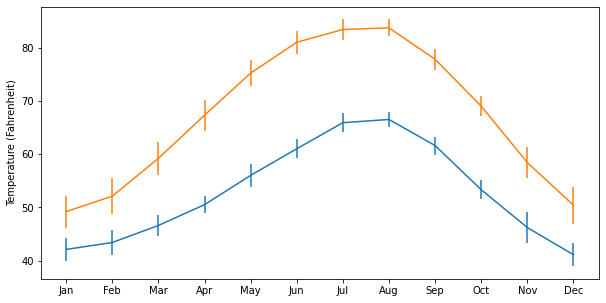

In [22]:
fig, ax = plt.subplots(figsize=(10,5))

# Add Seattle temperature data in each month with error bars
ax.errorbar(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"], yerr = seattle_weather["MLY-TAVG-STDDEV"])

# Add Austin temperature data in each month with error bars
ax.errorbar(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"], yerr = austin_weather["MLY-TAVG-STDDEV"])

# Set the y-axis label
ax.set_ylabel('Temperature (Fahrenheit)')

plt.show()

## Creating boxplots

Boxplots provide additional information about the distribution of the data that they represent. They tell us what the median of the distribution is, what the inter-quartile range is and also what the expected range of approximately 99% of the data should be. Outliers beyond this range are particularly highlighted.

In this exercise, you will use the data about medalist heights that you previously visualized as histograms, and as bar charts with error bars, and you will visualize it as boxplots.

Again, you will have the `mens_rowing` and `mens_gymnastics` DataFrames available to you, and both of these DataFrames have columns called `"Height"` that you will compare.

### Instructions
- Create a boxplot that contains the `"Height"` column for `mens_rowing` on the left and `mens_gymnastics` on the right.
- Add `x-axis` tick labels: `"Rowing" and "Gymnastics"`.
- Add a `y-axis` label: `"Height (cm)"`.

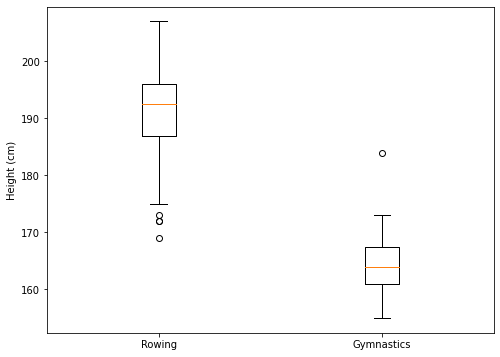

In [30]:
fig, ax = plt.subplots(figsize = (8,6))

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([mens_rowing['Height'],mens_gymnastics['Height']])

# Add x-axis tick labels:
ax.set_xticklabels(['Rowing', 'Gymnastics'])

# Add a y-axis label
ax.set_ylabel('Height (cm)')

plt.show()

## Simple scatter plot

Scatter are a bi-variate visualization technique. They plot each record in the data as a point. The location of each point is determined by the value of two variables: the first variable determines the distance along the x-axis and the second variable determines the height along the y-axis.

In this exercise, you will create a scatter plot of the `climate_change` data. This DataFrame, which is already loaded, has a column `"co2"` that indicates the measurements of carbon dioxide every month and another column,`"relative_temp"` that indicates the temperature measured at the same time.

In [32]:
climate_change = pd.read_csv('datasets/climate_change.csv', parse_dates=['date'], index_col='date')
climate_change.head()

,co2,relative_temp
date,,
1958-03-06,315.71,0.10
1958-04-06,317.45,0.01
1958-05-06,317.50,0.08
1958-06-06,NaN,-0.05
1958-07-06,315.86,0.06


### Instructions
- Using the `ax.scatter` method, add the data to the plot: `"co2"` on the x-axis and `"relative_temp"` on the y-axis.
- Set the x-axis label to `"CO2 (ppm)"`.
- Set the y-axis label to `"Relative temperature (C)"`.

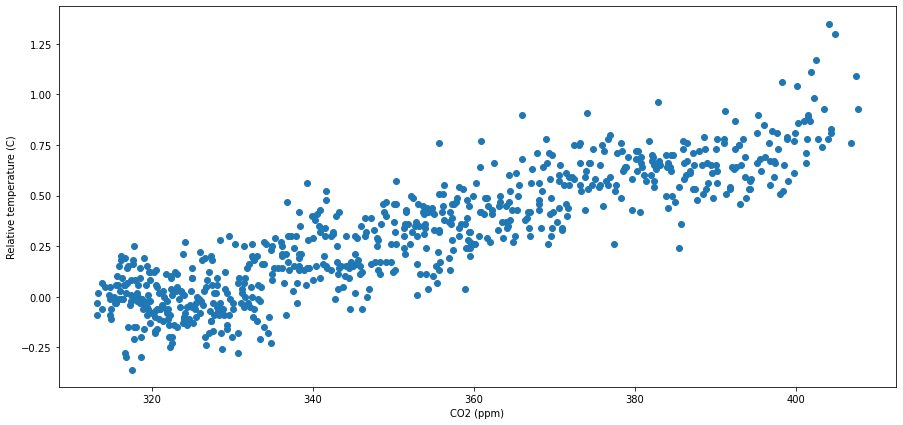

In [37]:
fig, ax = plt.subplots(figsize = (15,7))

# Add data: "co2" on x-axis, "relative_temp" on y-axis
ax.scatter(climate_change['co2'], climate_change['relative_temp'])

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel('CO2 (ppm)')

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel('Relative temperature (C)')

plt.show()

## Encoding time by color

The screen only has two dimensions, but we can encode another dimension in the scatter plot using color. Here, we will visualize the `climate_change` dataset, plotting a scatter plot of the `"co2"` column, on the x-axis, against the `"relative_temp"` column, on the y-axis. We will encode time using the color dimension, with earlier times appearing as darker shades of blue and later times appearing as brighter shades of yellow.

### Instructions
- Using the `ax.scatter` method add a scatter plot of the `"co2"` column (x-axis) against the `"relative_temp"` column.
- Use the `c` key-word argument to pass in the index of the DataFrame as input to color each point according to its date.
- Set the x-axis label to `"CO2 (ppm)"` and the y-axis label to `"Relative temperature (C)"`.

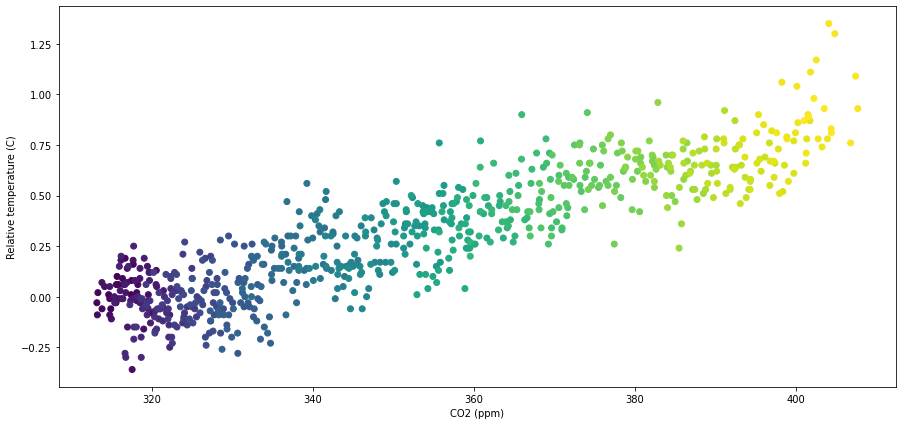

In [38]:
fig, ax = plt.subplots(figsize=(15,7))


# Add data: "co2", "relative_temp" as x-y, index as color
ax.scatter(climate_change['co2'], climate_change['relative_temp'], c = climate_change.index)
# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel('CO2 (ppm)')

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel('Relative temperature (C)')

plt.show()